# Tugas Proyek Akhir Pemrosesan Bahasa Alami
**Plagiarism Checker** 

**Kelompok 8 Kelas B**
- Haikal Mufid Mubarok (1217050059)
- Mochammad Rizky Ramadhani (1217050081)
- Muhammad Dzikri (1217050090)
- Rizky Dwi Putra (1217050127)


## Import Libraries

In [1]:
import nltk
nltk.download("popular")
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import string
from nltk.corpus import stopwords
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
import pickle

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\RIZKI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\RIZKI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\RIZKI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\RIZKI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\RIZKI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

## Install Library Tambahan

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## Load Dataset

In [3]:
data = pd.read_csv('formatted_data.csv')
print(data.head())  
data['label'].value_counts() 
print(data.dtypes) 

   index                                        source_text  \
0      0  A person on a horse jumps over a broken down a...   
1      1  A person on a horse jumps over a broken down a...   
2      2              Children smiling and waving at camera   
3      3              Children smiling and waving at camera   
4      4  A boy is jumping on skateboard in the middle o...   

                                plagiarized_text  label  
0  A person is at a diner, ordering an omelette.      0  
1              A person is outdoors, on a horse.      1  
2                     There are children present      1  
3                          The kids are frowning      0  
4              The boy skates down the sidewalk.      0  
index                int64
source_text         object
plagiarized_text    object
label                int64
dtype: object


In [4]:
data['label'].value_counts()

label
0    183966
1    183407
Name: count, dtype: int64

In [5]:
print(data.dtypes)

index                int64
source_text         object
plagiarized_text    object
label                int64
dtype: object


## Preprocessing Data

In [6]:
def test_text(text):
    if not isinstance(text, str):
        text = str(text) 
    return text

data["plagiarized_text"] = data["plagiarized_text"].apply(test_text)


In [7]:
def preprocess_text(text):
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.lower()
    stop_words = set(stopwords.words("english"))
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text
data["source_text"] = data["source_text"].apply(preprocess_text)
data["plagiarized_text"] = data["plagiarized_text"].apply(preprocess_text)

## Feature Extraction

In [8]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data["source_text"] + " " + data["plagiarized_text"])
y = data["label"]

## Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardisasi Data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##  Model Training and Evaluation

## XGBoost Model

In [11]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluation Model
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Evaluation Result
print("Accuracy:", accuracy_xgb)
print("\nClassification Report:")
print(classification_rep_xgb)
print("\nConfusion Matrix:")
print(cm_xgb)


Accuracy: 0.7306022456617898

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.71     36795
           1       0.70      0.82      0.75     36680

    accuracy                           0.73     73475
   macro avg       0.74      0.73      0.73     73475
weighted avg       0.74      0.73      0.73     73475


Confusion Matrix:
[[23682 13113]
 [ 6681 29999]]


## Logistic Regression Model

In [12]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')  
model.fit(X_train_scaled, y_train)

# Evaluation Model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Evaluation Result
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.68544402858115

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67     36795
           1       0.67      0.72      0.70     36680

    accuracy                           0.69     73475
   macro avg       0.69      0.69      0.69     73475
weighted avg       0.69      0.69      0.69     73475


Confusion Matrix:
[[23984 12811]
 [10301 26379]]


## Multinomial Naive Bayes Model

In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluation Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Evaluation Result
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.6417556992174209
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62     36795
           1       0.63      0.71      0.66     36680

    accuracy                           0.64     73475
   macro avg       0.64      0.64      0.64     73475
weighted avg       0.64      0.64      0.64     73475

Confusion Matrix:
[[21260 15535]
 [10787 25893]]


## Model and Vectorizer Saving

In [14]:
import pickle

pickle.dump(xgb_model, open("xgb_model.pkl", 'wb'))

pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

## Test Model

### Model Load

In [15]:
xgb_model = pickle.load(open('xgb_model.pkl', 'rb'))

tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

### Plagiarism Detection Function

In [16]:
def detect(input_text):
    # Transformasi input teks menggunakan tfidf_vectorizer
    vectorized_text = tfidf_vectorizer.transform([input_text])
    
    # Prediksi menggunakan model XGBoost yang telah dimuat
    result = xgb_model.predict(vectorized_text)
    
    # Menyatakan hasil prediksi
    return "Plagiarism Detected" if result[0] == 1 else "No Plagiarism"


### Example Test

In [17]:
# example ( it is a plagarized text)
input_text = 'A man stands next to a ca'
detect(input_text)

'Plagiarism Detected'

In [18]:
# example ( it has no plagiarism)
input_text = 'A man sits inside a car.'
detect(input_text)

'No Plagiarism'

## Visualization

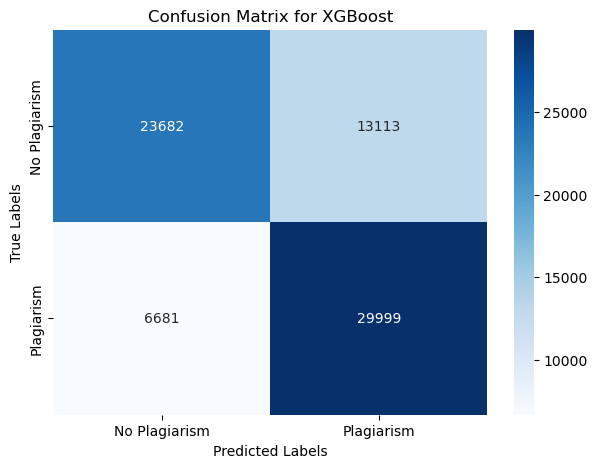

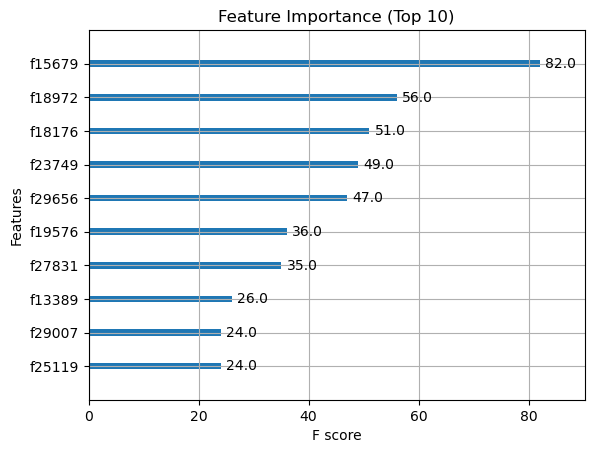

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualisasi Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["No Plagiarism", "Plagiarism"], yticklabels=["No Plagiarism", "Plagiarism"])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualisasi Feature Importance
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight', title="Feature Importance (Top 10)")
plt.show()